In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings

In [2]:
warnings.simplefilter(action='ignore', category=FutureWarning)
os.getcwd()


'C:\\Users\\Shubham Pathak\\Sales Prediction Using Python'

In [6]:
df = pd.read_csv("C:\\Users\\Shubham Pathak\\Sales Prediction Using Python\\Advertising.csv")

In [7]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [8]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [9]:
df.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)

In [10]:
df

,Index,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [11]:
df.shape

(200, 5)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Index      200 non-null    int64  
 1   TV         200 non-null    float64
 2   Radio      200 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Index,200.0,100.5000,57.879185,1.0,50.750,100.50,150.250,200.0
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [14]:
df.isnull().values.any()
df.isnull().sum()

Index        0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

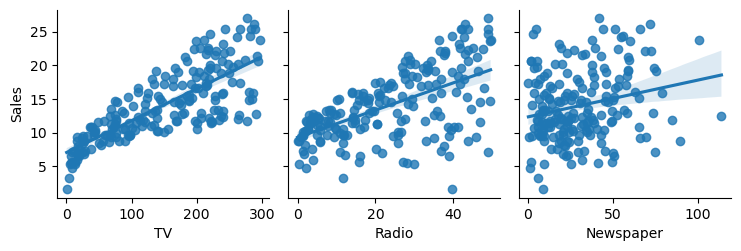

In [15]:
sns.pairplot(df, x_vars=["TV", "Radio", "Newspaper"], y_vars="Sales", kind="reg")

array([[<Axes: title={'center': 'Index'}>,
        <Axes: title={'center': 'TV'}>],
       [<Axes: title={'center': 'Radio'}>,
        <Axes: title={'center': 'Newspaper'}>],
       [<Axes: title={'center': 'Sales'}>, <Axes: >]], dtype=object)

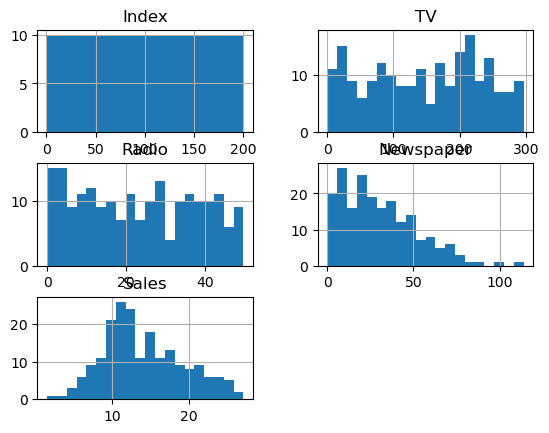

In [16]:
df.hist(bins=20)

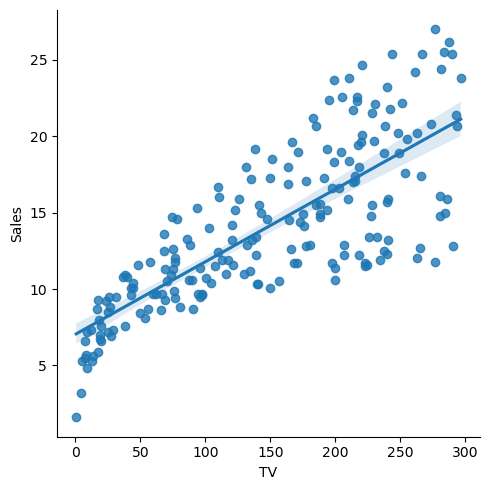

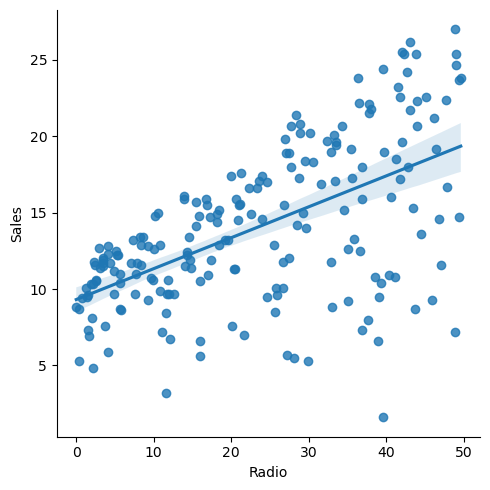

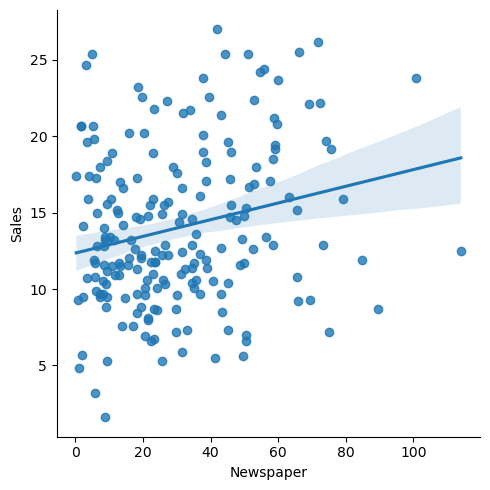

In [17]:
sns.lmplot(x='TV', y='Sales', data=df)
sns.lmplot(x='Radio', y='Sales', data=df)
sns.lmplot(x='Newspaper',y= 'Sales', data=df)

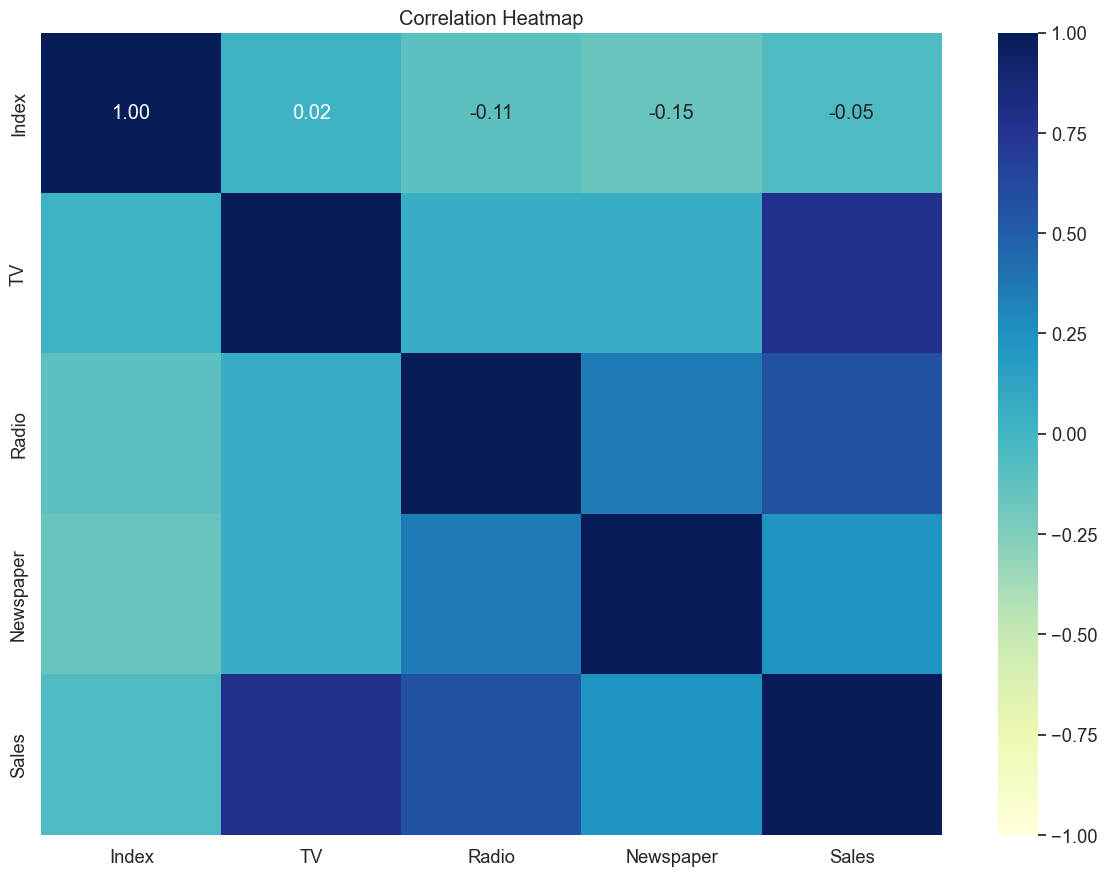

In [18]:
corrmat = df.corr()
# Set up the figure and axis for the heatmap
plt.figure(figsize=(12, 9))
sns.set(font_scale=1.2)  # Adjust font size for better readability

# Create a heatmap using Seaborn
sns.heatmap(corrmat, annot=True, cmap="YlGnBu", fmt=".2f", vmin=-1, vmax=1, center=0)

# Add title and adjust layout
plt.title("Correlation Heatmap")
plt.tight_layout()

# Display the heatmap
plt.show()

In [19]:
X = df.drop('Sales', axis=1)
y = df[["Sales"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=46)

In [20]:
lin_model = sm.ols(formula="Sales ~ TV + Radio + Newspaper", data=df).fit()

In [21]:
print("Coefficients:\n", lin_model.params, "\n")
print("Summary:\n", lin_model.summary(), "\n")

Coefficients:
 Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64 

Summary:
                             OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 05 Dec 2024   Prob (F-statistic):           1.58e-96
Time:                        15:27:05   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-

In [ ]:
results = []
names = []
models = [('LinearRegression', LinearRegression())]

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    result = np.sqrt(mean_squared_error(y_test, y_pred))
    results.append(result)
    names.append(name)
    msg = f"{name}: {result:.4f}"
    print(msg)